In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [89]:
import os
ADULT_DIRECTORY = os.path.join(os.getcwd(), 'data','adult')
ADULT_PATH = os.path.join(ADULT_DIRECTORY, 'adult.csv')

In [98]:
data = pd.read_csv(ADULT_PATH)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [264]:
def plot_categs(df, category, fignum=1, title=None):
    plt.figure(fignum)
    uniques= df[category].unique()
    counts = [df[df[category] == value].shape[0] for value in uniques]
    size = len(uniques)
    xcoords = list(range(1, size+1))
    plt.bar(xcoords, counts)
    plt.xticks(xcoords, uniques, rotation='vertical' if size > 5 else 'horizontal')
    plt.title((title if title is not None else '')+" By "+category)
    plt.tight_layout()

# Understanding demographics

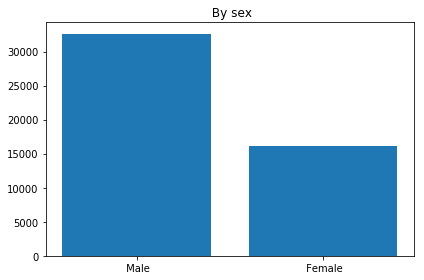

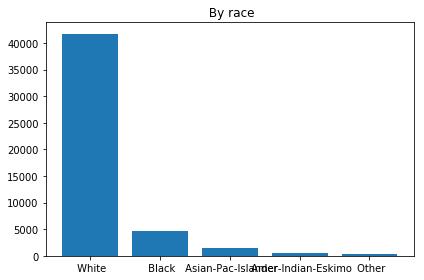

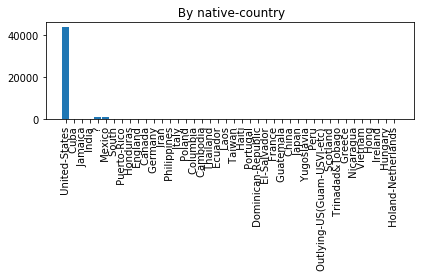

In [265]:
features = ['sex', 'race', 'native-country']
for index, feature in enumerate(features):
    plot_categs(data, feature, fignum=index+1)

# Education Level and Occupation

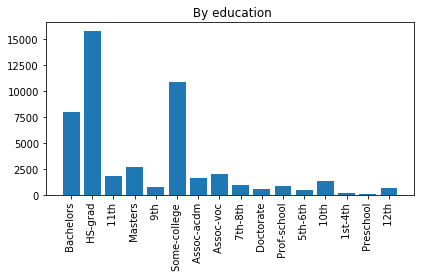

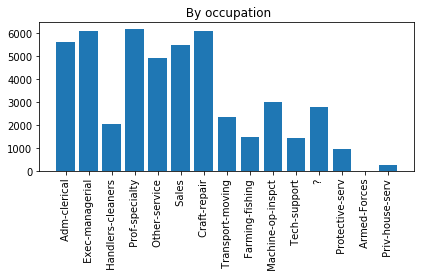

In [266]:
other_features = ['education', 'occupation']
for index, feature in enumerate(other_features):
    plot_categs(data, feature, fignum=index+1)

# Salary

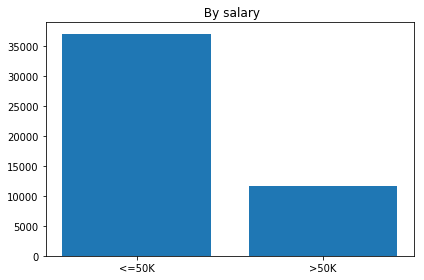

In [267]:
plot_categs(data, 'salary')

# Exploring gender bias in the dataset

In [268]:
# Examining statistics among_demographics
male_data = data[data.sex == ' Male']
female_data = data[data.sex == ' Female']

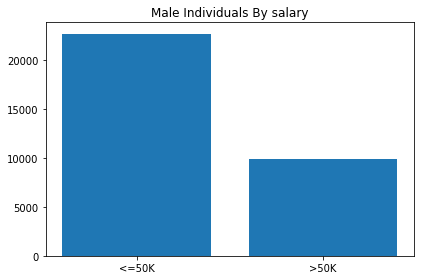

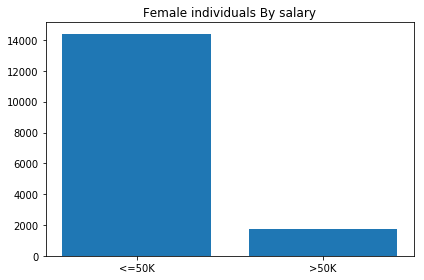

In [237]:
plot_categs(male_data, 'salary', fignum=1,title="Male Individuals")
plot_categs(female_data, 'salary', fignum=2, title="Female individuals")

## Exploring racial bias in the dataset 

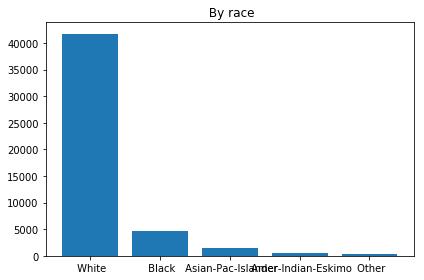

In [269]:
# Examine races in the dataset
plot_categs(data, 'race')

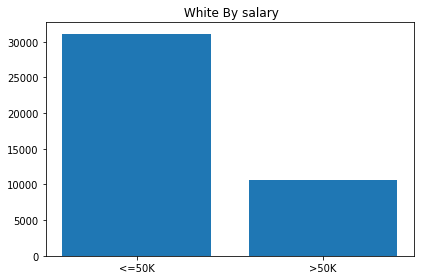

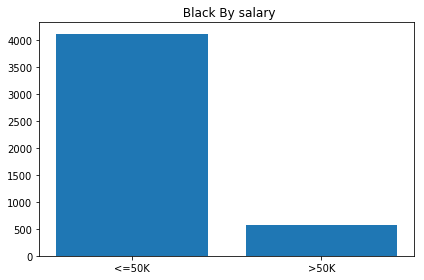

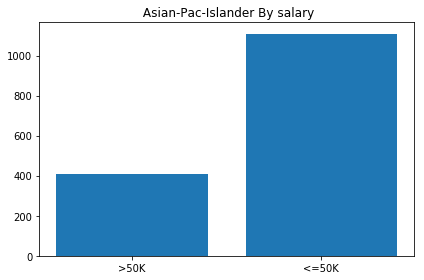

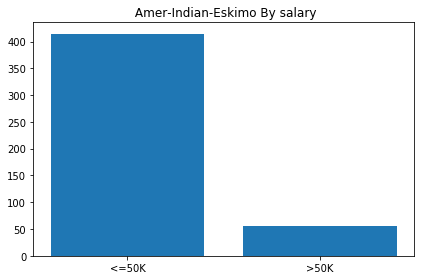

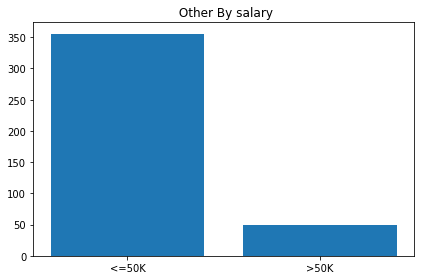

In [238]:
unique_races = data['race'].unique()
for index, race in enumerate(unique_races):
    plot_categs(df[df['race'] == race], 'salary', fignum=index, title = race)

## Explore hours worked per week in demographics

In [270]:
def plot_categ_hists(df, feature, title=None, bins=None, histtype='bar', density=False, normed=None, fignum=1):
    plt.figure(fignum)
    x = df[feature]
    plt.hist(x, bins=bins, density=density, normed=normed, histtype=histtype)
    plt.xlabel(feature)
    plt.title(title if title is not None else '')

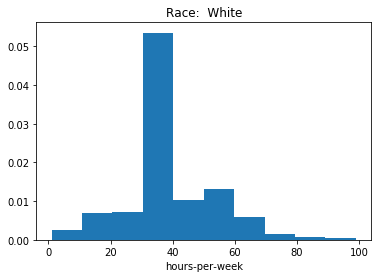

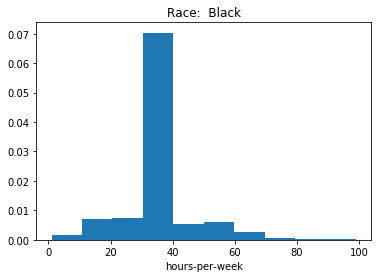

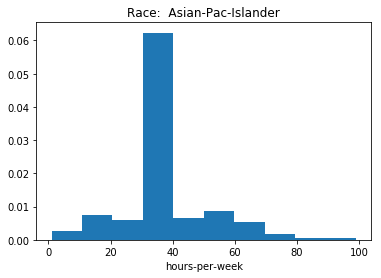

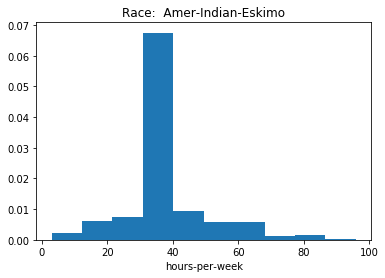

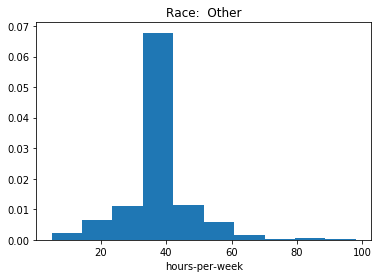

In [261]:
#Explore per race
unique_races = data.race.unique()
for index, race in enumerate(unique_races):
    plot_categ_hists(data[data.race==race], 'hours-per-week', fignum=index+1, title="Race: "+race, density=True)

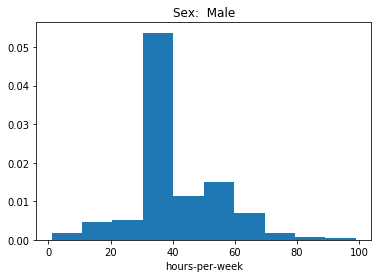

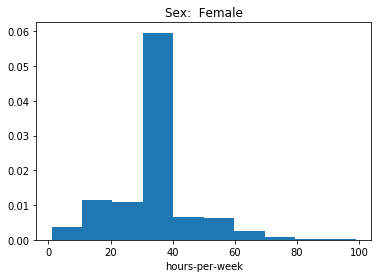

In [260]:
#Explore per gender
unique_sexes = data.sex.unique()
for index, sex in enumerate(unique_sexes):
    plot_categ_hists(data[data.sex==sex], 'hours-per-week', fignum=index+1, title="Sex: "+sex, density=True)

# Visualize correlations

In [188]:
def correlation_matrix(df, size=None):
    if size is None:
        size = df.columns.size
    correl = df.corr()
    figure, axes = plt.subplots(figsize=(size, size))
    axes.matshow(correl)
    plt.xticks(range(len(correl.columns)), correl.columns)
    plt.yticks(range(len(correl.columns)), correl.columns)
    plt.show()

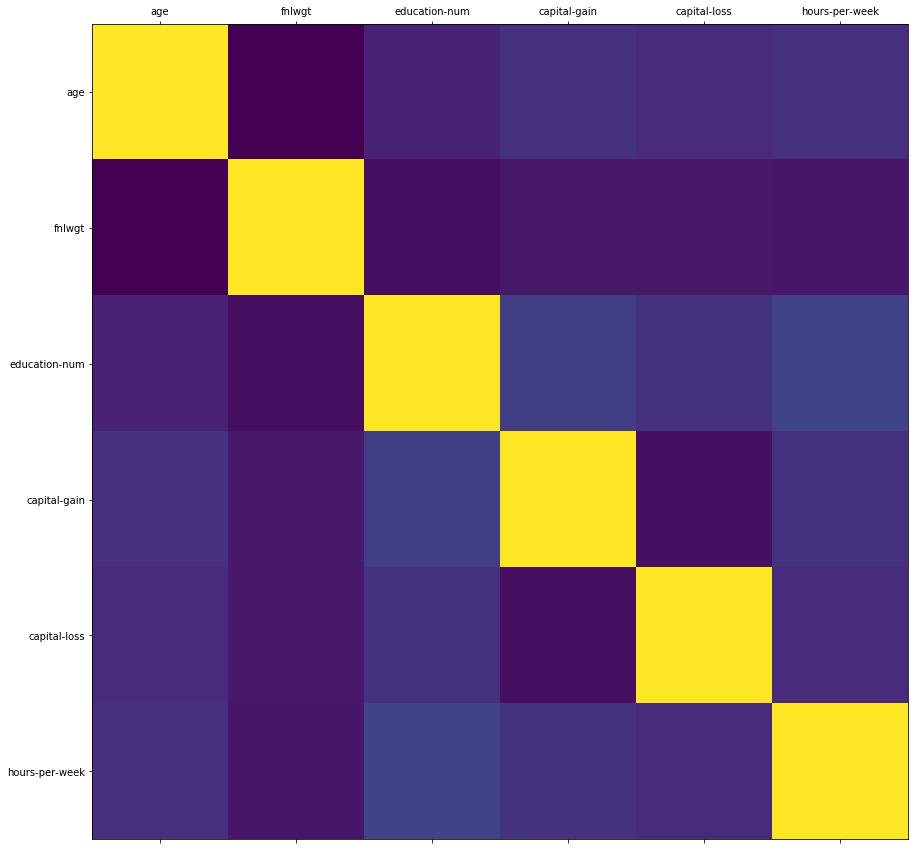

In [190]:
correlation_matrix(data, 15)

# Manipulating features for better understanding
This will help us understand values in terms of probabilities
Make the dataset ready for machine learning

In [305]:
datav2 = data.copy()

## Drop all missing values

In [299]:
datav2['native-country'].unique(), datav2['workclass'].unique(), datav2['occupation'].unique()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
        ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
        ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
        ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
        ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
        ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
        ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
        ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
        ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object),
 array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
        ' Never-worked'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Craft-repair',
        ' Transport-moving', ' Farming-fishing', ' Mach

In [300]:
features_with_empty_values = ['native-country', 'workclass', 'occupation']
for feature in features_with_empty_values:
    datav2[feature] = datav2[feature].replace(' ?', np.nan)
    
datav2.dropna(how='any', inplace=True)

In [301]:
datav2['native-country'].unique(), datav2['workclass'].unique(), datav2['occupation'].unique()

(array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
        ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
        ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
        ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
        ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
        ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
        ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
        ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
        ' Hungary', ' Holand-Netherlands'], dtype=object),
 array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
        ' Local-gov', ' Self-emp-inc', ' Without-pay'], dtype=object),
 array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
        ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
        ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
        ' Craft-repai

## Change country to US vs non-US

In [306]:
datav2[datav2['native-country'] == ' United-States'].shape

(43832, 15)

In [307]:
datav2.loc[datav2['native-country']!=' United-States', 'native-country'] = 'Non-US'
datav2.loc[datav2['native-country'] == ' United-States', 'native-country'] = 'US'


In [308]:
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,US,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,US,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,US,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,US,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Non-US,<=50K


# Convert country and gender into integer

In [309]:
datav2['native-country'] = datav2['native-country'].map({'US':1,'Non-US':0}).astype(int)
datav2['sex'] = datav2['sex'].map({' Male':1,' Female':0})
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,1,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,1,0.0,0.0,13.0,1,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,1,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,1,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,0,<=50K


In [311]:
# Sex vs salary
datav2[['sex', 'salary']].groupby(['sex']).mean()

,salary
sex,
0,0.109251
1,0.303767


In [313]:
# native-country vs salary
datav2[['native-country', 'salary']].groupby(['native-country']).mean()

,salary
native-country,
0,0.198204
1,0.243977


In [314]:
datav2[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Divorced,0.101161
Married-AF-spouse,0.378378
Married-civ-spouse,0.446133
Married-spouse-absent,0.092357
Never-married,0.045480
Separated,0.064706
Widowed,0.084321


# Marital status is either single, or is a couple

We will categorize marital status into single or couple

In [315]:
datav2['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [318]:
datav2['marital-status'] = datav2['marital-status'].replace([' Divorced',' Married-spouse-absent',' Never-married',' Separated',' Widowed'],'Single')
datav2['marital-status'] = datav2['marital-status'].replace([' Married-AF-spouse',' Married-civ-spouse'],'Couple')
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,Single,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,1,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Couple,Exec-managerial,Husband,White,1,0.0,0.0,13.0,1,0
2,38,Private,215646.0,HS-grad,9.0,Single,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,1,0
3,53,Private,234721.0,11th,7.0,Couple,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,1,0
4,28,Private,338409.0,Bachelors,13.0,Couple,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,0,0


In [319]:
datav2[['marital-status','salary']].groupby(['marital-status']).mean()

,salary
marital-status,
Couple,0.446021
Single,0.063914


In [320]:
datav2[['marital-status','relationship','salary']].groupby(['marital-status','relationship']).mean()

salary
marital-status relationship             
Couple          Husband         0.448671
                Not-in-family   0.217391
                Other-relative  0.143564
                Own-child       0.173611
                Wife            0.468897
Single          Not-in-family   0.101194
                Other-relative  0.017638
                Own-child       0.011564
                Unmarried       0.060293

In [321]:
datav2[['marital-status','relationship','salary']].groupby(['relationship','marital-status']).mean()

salary
relationship    marital-status          
 Husband        Couple          0.448671
 Not-in-family  Couple          0.217391
                Single          0.101194
 Other-relative Couple          0.143564
                Single          0.017638
 Own-child      Couple          0.173611
                Single          0.011564
 Unmarried      Single          0.060293
 Wife           Couple          0.468897

In [322]:
datav2['marital-status'] = datav2['marital-status'].map({'Couple':1,'Single':0})

In [325]:
datav2.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516.0,Bachelors,13.0,0,Adm-clerical,Not-in-family,White,1,2174.0,0.0,40.0,1,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,1,Exec-managerial,Husband,White,1,0.0,0.0,13.0,1,0
2,38,Private,215646.0,HS-grad,9.0,0,Handlers-cleaners,Not-in-family,White,1,0.0,0.0,40.0,1,0
3,53,Private,234721.0,11th,7.0,1,Handlers-cleaners,Husband,Black,1,0.0,0.0,40.0,1,0
4,28,Private,338409.0,Bachelors,13.0,1,Prof-specialty,Wife,Black,0,0.0,0.0,40.0,0,0
